In [21]:
!conda install -c conda-forge numpy scikit-learn optuna seaborn matplotlib -y

Solving environment: done

## Package Plan ##

  environment location: /home/tessmachado/miniconda3/envs/py37

  added / updated specs:
    - matplotlib
    - numpy
    - optuna
    - scikit-learn
    - seaborn


The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    pkgs/main::ca-certificates-2022.2.1-h~ --> conda-forge::ca-certificates-2021.10.8-ha878542_0
  certifi            pkgs/main::certifi-2021.10.8-py37h06a~ --> conda-forge::certifi-2021.10.8-py37h89c1867_1
  scikit-learn       pkgs/main::scikit-learn-1.0.2-py37h51~ --> conda-forge::scikit-learn-0.23.2-py37hddcf8d6_3


Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [91]:
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

# Import Scikit-Learn library for decision tree models
import sklearn         
from sklearn import linear_model, datasets
from sklearn.utils import resample
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
# Note - you will need version 0.24.1 of scikit-learn to load this library (SequentialFeatureSelector)
from sklearn.feature_selection import f_regression, SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Another statistic model library
#import statsmodels.api as sm
#import statsmodels.formula.api as smf

import scipy.stats as stats
import scipy
from scipy import interpolate
from scipy.interpolate import interp1d

import math

# hyperparameter optimization
import optuna
import sklearn.model_selection
import sklearn.preprocessing

In [155]:
data = pd.read_csv('TTS_data.csv')

/home/tessmachado/miniconda3/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (2,3,13,25,26,27,28,31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [158]:
data.columns

Index(['Unnamed: 0', 'dataProvider1', 'dataProvider2', 'program1ProjectID',
       'PTODate_orProxy_', 'systemSizeInDCSTC_KW_', 'totalInstalledCost___',
       'Up_FrontCashIncentive___', 'customerSegment', 'is_expansion',
       'is_multiphase', 'tracking_Y_N_', 'ground_mounted_Y_N_',
       'hostCustomerZip__4_', 'hostCustomerCity', 'state',
       'utilityServiceTerritory', 'x3rdPartyOwned_1_0_', 'installer_clean',
       'self_install_Y_N_', 'azimuth_1', 'tilt_1', 'mod_manuf1_clean',
       'mod_model1_clean', 'moduleQty_1', 'mod_manuf2_clean',
       'mod_model2_clean', 'mod_manuf3_clean', 'mod_model3_clean',
       'additionalModuleModels_Y_N_', 'mod_tech1', 'mod_tech2', 'mod_tech3',
       'mod_BIPV1', 'mod_bifacial1', 'mod_nameplate_capacity1',
       'mod_efficiency1', 'inv_manuf1_clean', 'inv_model1_clean',
       'inverterQuantity_1', 'additionalInverterModels_Y_N_', 'inv_microinv1',
       'inv_battery_hybrid1', 'inv_builtin_meter1', 'inv_outputcapacity1',
       'dc_optimi

In [156]:
df = data.where(data['totalInstalledCost___'] != -1).dropna()
#data.dropna(subset=['totalInstalledCost___'])
len(df)

497659

# Heatmaps

<AxesSubplot:>

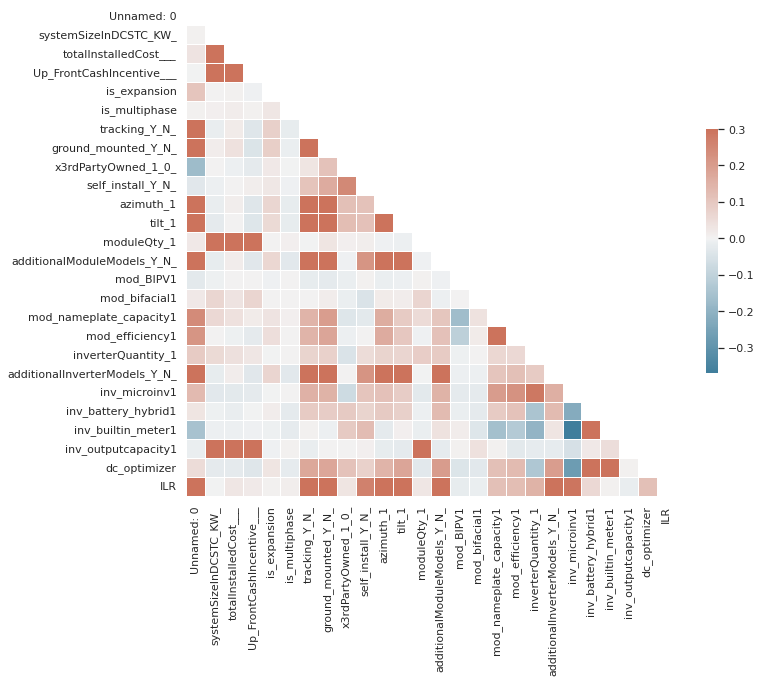

In [157]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
#d = pd.DataFrame(data=rs.normal(size=(100, 26)),
#                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


<AxesSubplot:>

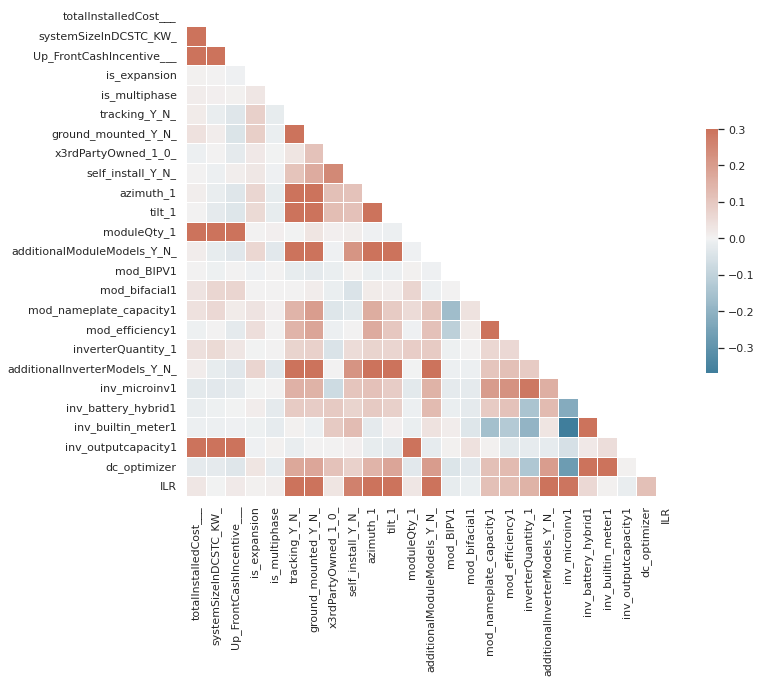

In [159]:
from string import ascii_letters

df1 = data[['totalInstalledCost___', 'systemSizeInDCSTC_KW_', 'Up_FrontCashIncentive___', 
       'is_expansion', 'is_multiphase', 'tracking_Y_N_', 'ground_mounted_Y_N_', 
       'x3rdPartyOwned_1_0_', 'self_install_Y_N_', 'azimuth_1', 'tilt_1', 'moduleQty_1', 
       'additionalModuleModels_Y_N_', 'mod_BIPV1', 'mod_bifacial1', 'mod_nameplate_capacity1', 
       'mod_efficiency1', 'inverterQuantity_1', 'additionalInverterModels_Y_N_', 'inv_microinv1',
       'inv_battery_hybrid1', 'inv_builtin_meter1', 'inv_outputcapacity1', 'dc_optimizer', 'ILR']]

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
#d = pd.DataFrame(data=rs.normal(size=(100, 26)),
#                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = df1.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Stepwise Selection

In [ ]:
X = data[['systemSizeInDCSTC_KW_', 'Up_FrontCashIncentive___', 
       'is_expansion', 'is_multiphase', 'tracking_Y_N_', 'ground_mounted_Y_N_', 
       'x3rdPartyOwned_1_0_', 'self_install_Y_N_', 'azimuth_1', 'tilt_1', 'moduleQty_1', 
       'additionalModuleModels_Y_N_', 'mod_BIPV1', 'mod_bifacial1', 'mod_nameplate_capacity1', 
       'mod_efficiency1', 'inverterQuantity_1', 'additionalInverterModels_Y_N_', 'inv_microinv1',
       'inv_battery_hybrid1', 'inv_builtin_meter1', 'inv_outputcapacity1', 'dc_optimizer', 'ILR']]
y = data['totalInstalledCost___']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21, random_state=9, shuffle = True)

In [33]:
names = 'systemSizeInDCSTC_KW_', 'Up_FrontCashIncentive___', 'is_expansion', 'is_multiphase', 'tracking_Y_N_', 'ground_mounted_Y_N_', 'x3rdPartyOwned_1_0_', 'self_install_Y_N_', 'azimuth_1', 'tilt_1', 'moduleQty_1', 'additionalModuleModels_Y_N_', 'mod_BIPV1', 'mod_bifacial1', 'mod_nameplate_capacity1', 'mod_efficiency1', 'inverterQuantity_1', 'additionalInverterModels_Y_N_', 'inv_microinv1','inv_battery_hybrid1', 'inv_builtin_meter1', 'inv_outputcapacity1', 'dc_optimizer', 'ILR'
f_names = np.array(names)

In [34]:
# Forward stepwise selection
sfs_forward = SequentialFeatureSelector(linear_model.LinearRegression(), 
                                        n_features_to_select=5, 
                                        direction = 'forward').fit(X,y)
print('support: ', sfs_forward.get_support(), "\n")
selected = sfs_forward.get_support(indices = True)
print(selected)
print('Selected input features using Forward Stepwise Selection: \n', f_names[selected])

support:  [ True False False False False False  True False False False  True False
 False False  True  True False False False False False False False False] 

[ 0  6 10 14 15]
Selected input features using Forward Stepwise Selection: 
 ['systemSizeInDCSTC_KW_' 'x3rdPartyOwned_1_0_' 'moduleQty_1'
 'mod_nameplate_capacity1' 'mod_efficiency1']


In [35]:
sfs_backward = SequentialFeatureSelector(linear_model.LinearRegression(), 
                                        n_features_to_select=5, 
                                        direction = 'backward').fit(X,y)

print('support: ', sfs_backward.get_support(), "\n")
selected = sfs_backward.get_support(indices = True)
print(selected)
print('Selected input features using Backward Stepwise Selection: \n', f_names[selected])

support:  [ True False False False False False  True False False False  True False
 False False  True  True False False False False False False False False] 

[ 0  6 10 14 15]
Selected input features using Backward Stepwise Selection: 
 ['systemSizeInDCSTC_KW_' 'x3rdPartyOwned_1_0_' 'moduleQty_1'
 'mod_nameplate_capacity1' 'mod_efficiency1']


# Hyperparameter Optimization

In [152]:
for i in data['totalInstalledCost___']:
    i = int(i)
    
X = data[['systemSizeInDCSTC_KW_', 'moduleQty_1', 'mod_nameplate_capacity1', 'mod_efficiency1']]
y = data['totalInstalledCost___']

X_dev, X_test, y_dev, y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.20, random_state=42)

X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(
    X_dev, y_dev, test_size=0.20, random_state=42)


In [153]:
#from sklearn.tree import DecisionTreeClassifier
def train_evaluate_hyperparameters(max_depth, min_weight_fraction_leaf):
    # create a model
    model = sklearn.tree.DecisionTreeClassifier(max_depth = max_depth, 
                                 min_weight_fraction_leaf = min_weight_fraction_leaf, 
                                 random_state = 42)
    # train the model on the training set
    model.fit(X_train, y_train)
    # evaluate the model on the validation set
    score = model.score(X_val, y_val)
    return score


In [154]:
# create hyperparameter value options for each hyperparameter
max_depth_options = list(range(1,10))
min_weight_fraction_options = np.linspace(0.0,0.5,10)

# create a matrix to store results
validation_score = np.empty(
    (len(max_depth_options), len(min_weight_fraction_options))
)

# for each combination, record the validation score
for i, max_depth in enumerate(max_depth_options):
    for j, min_weight_fraction in enumerate(min_weight_fraction_options):
        validation_score[i,j] = train_evaluate_hyperparameters(max_depth, min_weight_fraction)

ValueError: Unknown label type: 'continuous'

In [146]:
def objective(trial):
    # define hyperparameter space
    max_depth = trial.suggest_int('max_depth', 1, 5)
    min_weight_fraction_leaf = trial.suggest_uniform('min_weight_fraction_leaf', 0.0, 0.5)
    
    # get the score for the hyperparameters chosen
    score = train_evaluate_hyperparameters(max_depth, min_weight_fraction_leaf)
    return score

study = optuna.create_study(sampler=optuna.samplers.TPESampler(), direction='maximize')
study.optimize(objective, n_trials=50)
print('Best params: ', study.best_params)

[I 2022-03-06 19:00:13,637] A new study created in memory with name: no-name-146b4ba6-c269-4a8e-bed4-368408a55858
[W 2022-03-06 19:00:13,707] Trial 0 failed because of the following error: ValueError("Unknown label type: 'continuous'")
Traceback (most recent call last):
  File "/home/tessmachado/miniconda3/envs/py37/lib/python3.7/site-packages/optuna/study/_optimize.py", line 213, in _run_trial
    value_or_values = func(trial)
  File "/tmp/ipykernel_162/916664449.py", line 7, in objective
    score = train_evaluate_hyperparameters(max_depth, min_weight_fraction_leaf)
  File "/tmp/ipykernel_162/3471539339.py", line 8, in train_evaluate_hyperparameters
    model.fit(X_train, y_train)
  File "/home/tessmachado/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 942, in fit
  File "/home/tessmachado/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 203, in fit
  File "/home/tessmachado/miniconda3/envs/py37/lib/python3.7/site-pack

ValueError: Unknown label type: 'continuous'

# Various Plots

Text(0, 0.5, 'incentive')

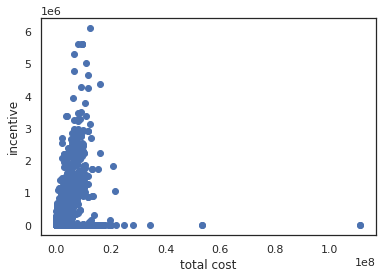

In [160]:
plt.scatter(df['totalInstalledCost___'], df['Up_FrontCashIncentive___'])
plt.xlabel('total cost')
plt.ylabel('incentive')

Text(0, 0.5, 'incentive')

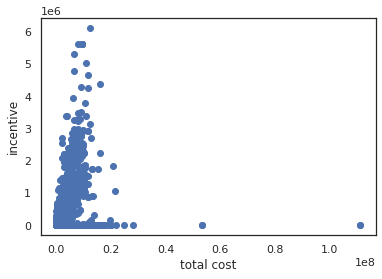

In [161]:
df3 = df.where(df['Up_FrontCashIncentive___'] != -1).dropna()
plt.scatter(df3['totalInstalledCost___'], df3['Up_FrontCashIncentive___'])
plt.xlabel('total cost')
plt.ylabel('incentive')

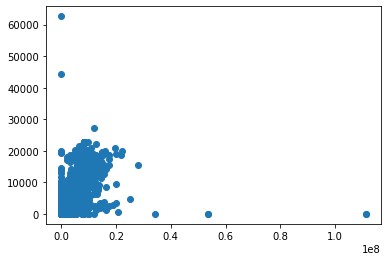

In [12]:
plt.scatter(data['totalInstalledCost___'], data['moduleQty_1'])

In [165]:
df3 = df.where(df['moduleQty_1'] != -1).dropna()

for i in range(len(df3)):
    if (df3['totalInstalledCost___'][i] != 0) and (df3['moduleQty_1'][i] != 0):
        plt.scatter(df3['totalInstalledCost___'][i], df3['moduleQty_1'][i], color = 'blue')
plt.xlabel('total cost')
plt.ylabel('quantity')

KeyError: 0

# Decision Tree Regressor

nope


In [166]:
# excludes 'x3rdPartyOwned_1_0_' since column only has 0 or 1 values
#X = data[['systemSizeInDCSTC_KW_', 'moduleQty_1', 'mod_nameplate_capacity1', 'mod_efficiency1']]
X = data[['systemSizeInDCSTC_KW_', 'moduleQty_1', 'mod_nameplate_capacity1']]
y = data['totalInstalledCost___']

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)
y_predict = regressor.predict(X_test)
print('Prediction accuracy MSE: ', mean_squared_error(y_test, y_predict))
print('R2 score: ', r2_score(y_test, y_predict))

Prediction accuracy MSE:  88916806099.27107
R2 score:  0.26927986340454124


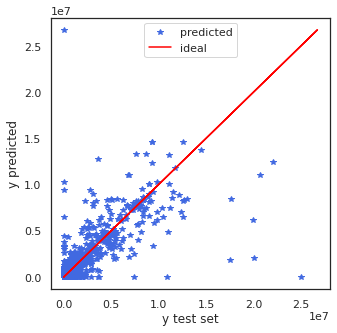

In [83]:
plt.figure(figsize=(5,5))
plt.plot(y_test, y_predict,'*', color='royalblue', label="predicted")
plt.plot(y_predict, y_predict,'-', color='red', label="ideal")
plt.xlabel('y test set')
plt.ylabel('y predicted')
plt.legend()
plt.show()


In [68]:
fig = plt.figure(figsize = (35,20))
tree.plot_tree(regressor, feature_names = data.feature_names, filled = True, fontsize = 20)
plt.tight_layout()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'feature_names'

<Figure size 2520x1440 with 0 Axes>

# Random Forest Classifier

In [69]:
rfc = RandomForestClassifier(n_estimators = 20, random_state = 42)
rfc = rfc.fit(X_train, y_train)

# How many classes are there?
print('Estimator', rfc.estimators_)
print('Maximum depth: ', rfc.max_depth)
print('Boostrapping with replacement', rfc.bootstrap)
print('Names of classes', rfc.classes_)
print('Number of classes', rfc.n_classes_)

# How accurate is your random forest estimator?
print('Mean accuracy on test set: ', rfc.score(X_test, y_test))

y_rf = rfc.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test, y_rf))
print('R2 socre', r2_score(y_test, y_rf))

ValueError: Unknown label type: 'continuous'

In [88]:
# excludes 'x3rdPartyOwned_1_0_' since column only has 0 or 1 values
for i in data['totalInstalledCost___']:
    if isinstance(i, int) == False: 
        i = int(i)

X = data[['systemSizeInDCSTC_KW_', 'moduleQty_1', 'mod_nameplate_capacity1', 'mod_efficiency1']]
y = data['totalInstalledCost___']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)

In [89]:
rfc = RandomForestClassifier(n_estimators = 20, random_state = 42)
rfc = rfc.fit(X_train, y_train)

# How many classes are there?
print('Estimator', rfc.estimators_)
print('Maximum depth: ', rfc.max_depth)
print('Boostrapping with replacement', rfc.bootstrap)
print('Names of classes', rfc.classes_)
print('Number of classes', rfc.n_classes_)

# How accurate is your random forest estimator?
print('Mean accuracy on test set: ', rfc.score(X_test, y_test))

y_rf = rfc.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test, y_rf))
print('R2 socre', r2_score(y_test, y_rf))

ValueError: Unknown label type: 'continuous'

# Regressors

In [168]:
estimator = DecisionTreeRegressor(max_depth=4)
clf_bag = BaggingRegressor(base_estimator=estimator, n_estimators=100, random_state=7)
clf_bag = clf_bag.fit(X_train, y_train)
y_predict = clf_bag.predict(X_test)
mse_bag = mean_squared_error(y_test, y_predict)
r2_bag = r2_score(y_test, y_predict)
print(mse_bag)
print(r2_bag)

KeyboardInterrupt: 

In [169]:
clf_RF = RandomForestRegressor(n_estimators = 100, max_depth = 4, max_features = 2, random_state = 7)
clf_RF = clf_RF.fit(X_train, y_train)
y_predict = clf_RF.predict(X_test)
mse_RF = mean_squared_error(y_test, y_predict)
r2_RF = r2_score(y_test, y_predict)
print(mse_RF)
print(r2_RF)

46735136730.51993
0.6159296876070213


In [106]:
clf_GB = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=1, random_state=7)
clf_GB = clf_GB.fit(X_train, y_train)
y_predict = clf_GB.predict(X_test)
mse_GB = mean_squared_error(y_test, y_predict)
r2_GB = r2_score(y_test, y_predict)
print(mse_GB)
print(r2_GB)

32473082818.13688
0.751974735565142


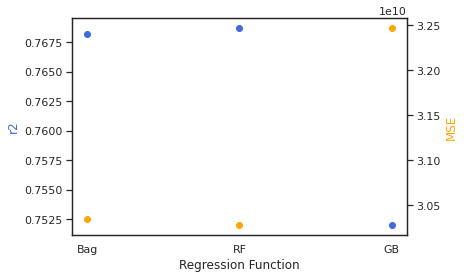

In [122]:
MSE = [mse_bag, mse_RF, mse_GB]
reg = ['Bag', 'RF', 'GB']
r2 = [r2_bag, r2_RF, r2_GB]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.scatter(reg, r2, color = 'royalblue', label = 'r2')
ax2.scatter(reg, MSE, color = 'orange', label = 'MSE')

ax1.set_xlabel('Regression Function')
ax1.set_ylabel('r2', color = 'royalblue')
ax2.set_ylabel('MSE', color = 'orange')

#ax1.legend()
#ax2.legend()
plt.show()

# Combine Data

In [ ]:
d1 = 'part1.csv'
d2 = 'part2.csv'

comb_df = pd.concat(map(pd.read_csv, [d1,d2]), ignore_index = True, sort = False)
#comb_df.head()
comb_df = comb_df.where(comb_df['mod_efficiency1'] != -1).dropna()
print(len(comb_df))
print(len(data))
comb_df = comb_df.replace(to_replace = -1, value = 0)
#comb_df.head()
comb_df['TotalModules'] = comb_df['moduleQty_1'] + comb_df['moduleQty_2']
comb_df['TotalModules']= comb_df['TotalModules'] + comb_df['moduleQty_3'] 
comb_df['TotalModules'] = comb_df['TotalModules'] + comb_df['additionalModuleModels_Y_N_']
comb_df.head()